In [1]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import string

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from utilidades.graficar import ver_dispersion
from utilidades.reducir_uso_memoria import reduce_mem_usage

### Preprocesamiento inicial

In [2]:
ruta_data = "../data"
ruta_train = ruta_data + "/train.csv"
ruta_test = ruta_data + "/test.csv"
ruta_submits = "../submits"

In [3]:
def to_ascii(s):
    car_ascii = set(string.printable)
    return "".join([a for a in s if a in car_ascii])

In [4]:
train_limpio = reduce_mem_usage(pd.read_csv(f"{ruta_data}/train_limpio.csv"))
test_limpio = reduce_mem_usage(pd.read_csv(f"{ruta_data}/test_limpio.csv"))

In [5]:
train_limpio = train_limpio.drop(["dia"], axis=1)
test_limpio = test_limpio.drop(["dia"], axis=1)

In [6]:
poblacion_train = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_train.csv")
poblacion_test = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_test.csv")

In [7]:
train_limpio["poblacion"] = poblacion_train
test_limpio["poblacion"] = poblacion_test

In [8]:
train_limpio = train_limpio.rename(columns={col: to_ascii(col) for col in train_limpio.columns})
test_limpio = test_limpio.rename(columns={col: to_ascii(col) for col in test_limpio.columns})

In [9]:
id_zona_train = pd.read_csv(f"{ruta_data}/id_zona_train.csv")
id_zona_test = pd.read_csv(f"{ruta_data}/id_zona_test.csv")

In [10]:
train_limpio["idzona"] = id_zona_train["idzona"]
test_limpio["idzona"] = id_zona_test["idzona"]

In [11]:
tiene_terraza = pd.read_csv(f"{ruta_data}/features/tiene_terraza_train.csv")

train_limpio["tiene_terraza"] = tiene_terraza

In [12]:
tiene_terraza_tes = pd.read_csv(f"{ruta_data}/features/tiene_terraza_test.csv")

test_limpio["tiene_terraza"] = tiene_terraza_tes

In [13]:
tiene_jardin = pd.read_csv(f"{ruta_data}/features/tiene_jardin_train.csv")

train_limpio["tiene_jardin"] = tiene_jardin

In [14]:
tiene_jardin_tes = pd.read_csv(f"{ruta_data}/features/tiene_jardin_test.csv")

test_limpio["tiene_jardin"] = tiene_jardin_tes

In [15]:
tiene_servicio = pd.read_csv(f"{ruta_data}/features/tiene_servicio_train.csv")

train_limpio["tiene_servicio"] = tiene_servicio

In [16]:
tiene_servicio_tes = pd.read_csv(f"{ruta_data}/features/tiene_servicio_test.csv")

test_limpio["tiene_servicio"] = tiene_servicio_tes

In [17]:
tiene_vestidor = pd.read_csv(f"{ruta_data}/features/tiene_vestidor_train.csv")

train_limpio["tiene_vestidor"] = tiene_vestidor

In [18]:
tiene_vestidor_tes = pd.read_csv(f"{ruta_data}/features/tiene_vestidor_test.csv")

test_limpio["tiene_vestidor"] = tiene_vestidor_tes

In [19]:
tiene_vista = pd.read_csv(f"{ruta_data}/features/tiene_vista_train.csv")

train_limpio["tiene_vista"] = tiene_vista

In [20]:
tiene_vista_tes = pd.read_csv(f"{ruta_data}/features/tiene_vista_test.csv")

test_limpio["tiene_vista"] = tiene_vista_tes

In [21]:
tiene_salon = pd.read_csv(f"{ruta_data}/features/tiene_salon_train.csv")

train_limpio["tiene_salon"] = tiene_salon

In [22]:
tiene_salon_tes = pd.read_csv(f"{ruta_data}/features/tiene_salon_test.csv")

test_limpio["tiene_salon"] = tiene_salon_tes

In [23]:
tiene_cuarto = pd.read_csv(f"{ruta_data}/features/tiene_cuarto_train.csv")

train_limpio["tiene_cuarto"] = tiene_cuarto

In [24]:
tiene_cuarto_tes = pd.read_csv(f"{ruta_data}/features/tiene_cuarto_test.csv")

test_limpio["tiene_cuarto"] = tiene_cuarto_tes

In [25]:
tiene_family = pd.read_csv(f"{ruta_data}/features/tiene_family_train.csv")

train_limpio["tiene_family"] = tiene_family

In [26]:
tiene_family_tes = pd.read_csv(f"{ruta_data}/features/tiene_family_test.csv")

test_limpio["tiene_family"] = tiene_family_tes

---

### Corrida sin usar descripciones

In [27]:
'''X, y = train_limpio.drop(["precio"], axis=1),train_limpio["precio"]'''

'X, y = train_limpio.drop(["precio"], axis=1),train_limpio["precio"]'

In [28]:
'''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)'''

'X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)'

In [29]:
'''y_train_l = np.log(y_train)
d_train = lgb.Dataset(X_train, label= y_train_l)
param = {
'num_leaves': 200,
"learning_rate": 0.03,
"num_iterations": 4000,
"feature_fraction":0.6
}
reg = lgb.train(param, d_train)
pred = reg.predict(X_test)
pred = np.exp(pred)'''

'y_train_l = np.log(y_train)\nd_train = lgb.Dataset(X_train, label= y_train_l)\nparam = {\n\'num_leaves\': 200,\n"learning_rate": 0.03,\n"num_iterations": 4000,\n"feature_fraction":0.6\n}\nreg = lgb.train(param, d_train)\npred = reg.predict(X_test)\npred = np.exp(pred)'

In [30]:
'''mean_absolute_error(y_test, pred)'''

'mean_absolute_error(y_test, pred)'

In [31]:
'''ver_dispersion(y_test, pred)'''

'ver_dispersion(y_test, pred)'

---

### Corrida usando las descripciones, asegurarse de tener los csv con las descripciones hasheadas, sino las tenes corre el notebook de _feature_hashing_descripciones_ reemplazando _cantidad_de_dimensiones_ por el valor que quieras

In [32]:
n_dimensiones = 1000

In [33]:
desc_train = pd.read_csv(f"{ruta_data}/features/descr_vectorizadas_train_{n_dimensiones}d.csv")

In [34]:
desc_test = pd.read_csv(f"{ruta_data}/features/descr_vectorizadas_test_{n_dimensiones}d.csv")

In [35]:
#desc_train = reduce_mem_usage(desc_train)

In [36]:
#desc_test = reduce_mem_usage(desc_test)

In [37]:
train_limpio = pd.concat([train_limpio, desc_train], axis=1)

In [38]:
test_limpio = pd.concat([test_limpio, desc_test], axis=1)

In [39]:
X, y = train_limpio.drop(["precio"], axis=1),train_limpio["precio"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [41]:
# 16000 iter, 400 leaves --> 21 minutos FULL POWER
# 

%%time 
y_train_l = np.log(y_train)
d_train = lgb.Dataset(X_train, label= y_train_l)
param = {
'num_leaves': 400,
"learning_rate": 0.03,
"num_iterations": 16000,
"metric" : "l1",
"feature_fraction":0.6
}
reg = lgb.train(param, d_train)
pred = reg.predict(X_test)
pred = np.exp(pred)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Wall time: 21min 13s


In [42]:
%%time
pred = reg.predict(X_test)
pred = np.exp(pred)

Wall time: 1min


In [43]:
# === 889 ===
# 505 525 (8k)
# 502 917 (16k)
# 501 025 (8k 400 hojas)
# 500 787 (16k 400 hojas, l1 )

# === 100 ===
# 501 640 (16k 400 hojas, l1 ) --> 511 310


# USAR SEED EN 100 YA QUE SE PARECE MÁS AL DE KAGGLE. DA UN POCO MENOS QUE EL DE KAGGLE.
mean_absolute_error(y_test, pred)

501640.4244834515

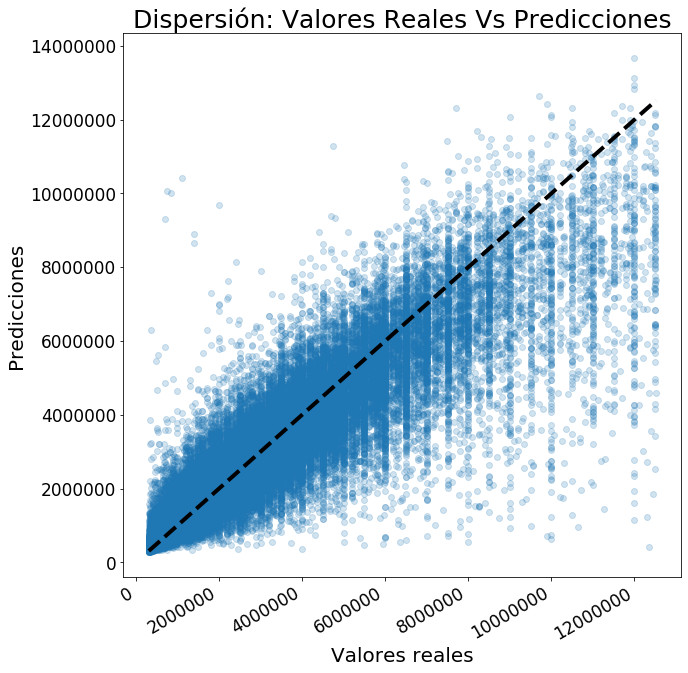

In [44]:
ver_dispersion(y_test, pred)

### Para generar un submit

In [45]:
%%time
y_l = np.log(y)
d_train = lgb.Dataset(X, label= y_l)
reg = lgb.train(param, d_train)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Wall time: 24min 53s


In [46]:
pred_test = reg.predict(test_limpio)
pred_test = np.exp(pred_test)

In [47]:
ids_test = pd.read_csv(f"{ruta_data}/ids_test.csv")

In [48]:
ids_test["target"] = pred_test

#### Ponele algun nombre al csv

In [49]:
ids_test.to_csv(f"{ruta_submits}/lgbm_1000_16000.csv",index=False)